In [1]:
from pydub import AudioSegment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\yutaw\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
sound1 = AudioSegment.from_file("ZOOM0007_Tr1.WAV", "WAV")
sound2 = AudioSegment.from_file("ZOOM0007_Tr3.WAV", "WAV")

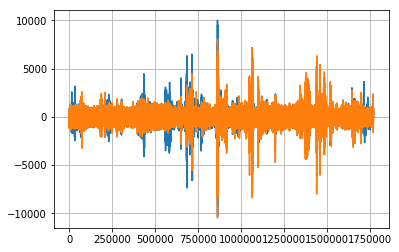

In [3]:
# 音声データをリストで抽出
list_sound1 = sound1.get_array_of_samples()
list_sound2 = sound2.get_array_of_samples()

# リストをグラフ化
plt.plot(list_sound1)
plt.plot(list_sound2)
plt.grid()
plt.show()

In [4]:
num=50

In [5]:
sound_array1=np.zeros(num)
sound_array2=np.zeros(num)

In [6]:
for i in range(num):
    sound_array1[i]=max((list_sound1[int(len(list_sound1)/num)*i:int(len(list_sound1)/num)*(i+1)]))
    sound_array2[i]=max((list_sound2[int(len(list_sound2)/num)*i:int(len(list_sound2)/num)*(i+1)]))

In [7]:
df1=pd.DataFrame(sound_array1)
df2=pd.DataFrame(sound_array2)

In [8]:
df=pd.concat([df1,df2],axis=1)

In [9]:
# df=df.reset_index(drop=True)

In [10]:
df.columns=[0,1]

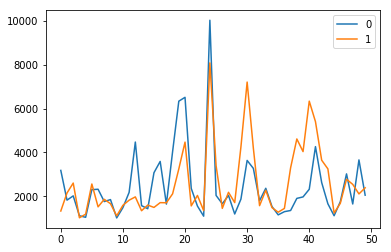

In [11]:
df.plot()

In [12]:
df_new=df.T

In [13]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,3183.0,1828.0,2022.0,1116.0,1046.0,2306.0,2324.0,1763.0,1853.0,1018.0,...,2324.0,4266.0,2630.0,1661.0,1118.0,1757.0,3024.0,1653.0,3661.0,2054.0
1,1332.0,2154.0,2606.0,1024.0,1188.0,2563.0,1523.0,1865.0,1666.0,1113.0,...,6338.0,5405.0,3648.0,3252.0,1242.0,1683.0,2780.0,2547.0,2111.0,2390.0


In [21]:
df_judge=pd.DataFrame(np.zeros(len(df_new.columns))).T

In [31]:
for i in range(len(df_new.columns)):
    df_judge.iloc[0,i]=(df_new.iloc[0,i]-df_new.iloc[1,i])/min(df_new.iloc[0,i],df_new.iloc[1,i])
   
        
            

In [39]:
df_judge.to_csv("data_judge.csv")

In [41]:
df_new.to_csv("data_siritori.csv")